<a href="https://www.kaggle.com/code/manthanvarmas/mall-customer-segmentation-eda-ml?scriptVersionId=202434640" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mall-customers-segmentation/Mall_Customers.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('/kaggle/input/mall-customers-segmentation/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
print(df['Genre'].unique())

['Male' 'Female']


In [6]:
df['Genre'] = df['Genre'].map({'Male': 0, 'Female': 1})
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


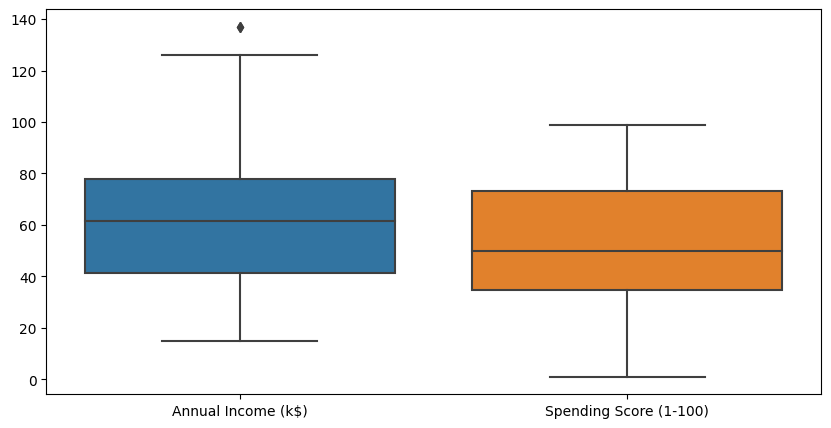

In [7]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

In [8]:
scaler = StandardScaler()

columns_to_scale = ['Annual Income (k$)', 'Spending Score (1-100)']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
print(df.head())

   CustomerID  Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1      0   19           -1.738999               -0.434801
1           2      0   21           -1.738999                1.195704
2           3      1   20           -1.700830               -1.715913
3           4      1   23           -1.700830                1.040418
4           5      1   31           -1.662660               -0.395980


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

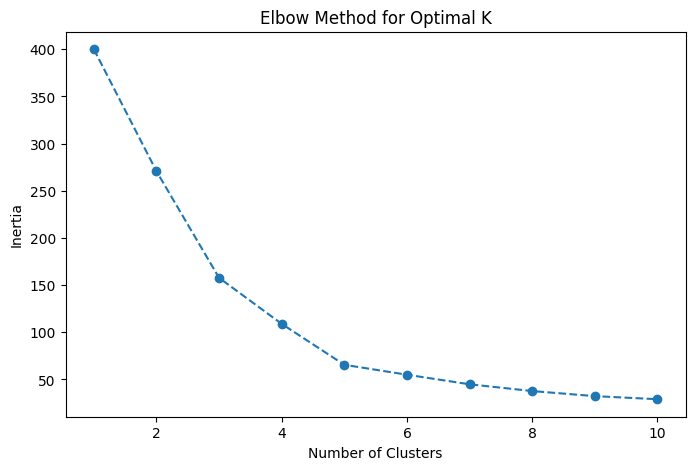

In [9]:
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df[columns_to_scale])
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [10]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[columns_to_scale])
df

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,0,19,-1.738999,-0.434801,0
1,2,0,21,-1.738999,1.195704,0
2,3,1,20,-1.700830,-1.715913,0
3,4,1,23,-1.700830,1.040418,0
4,5,1,31,-1.662660,-0.395980,0
...,...,...,...,...,...,...
195,196,1,35,2.268791,1.118061,2
196,197,1,45,2.497807,-0.861839,1
197,198,0,32,2.497807,0.923953,2
198,199,0,32,2.917671,-1.250054,1


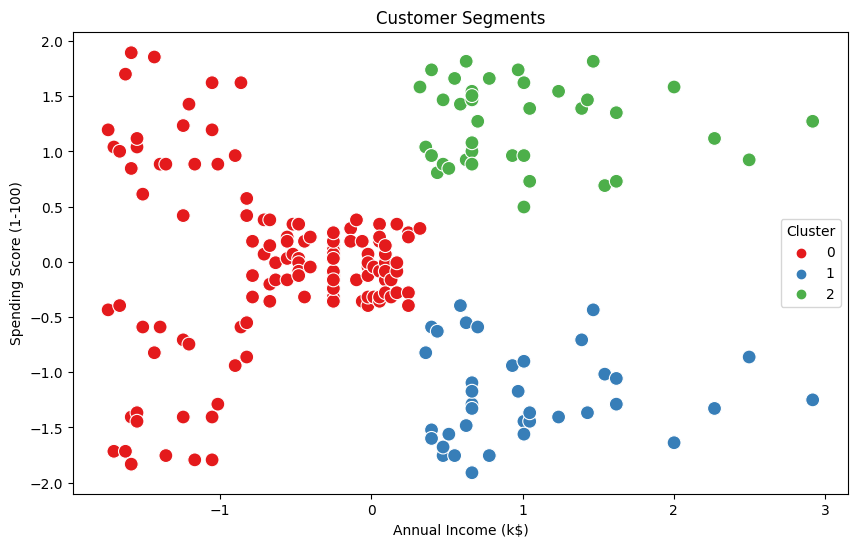

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='Set1', s=100)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

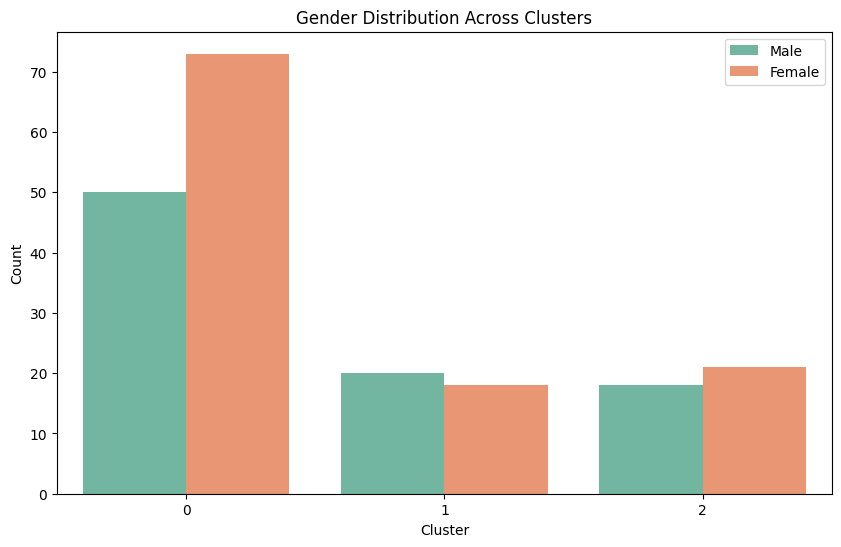

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', hue='Genre', data=df, palette='Set2')
plt.title('Gender Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(['Male', 'Female'])
plt.show()

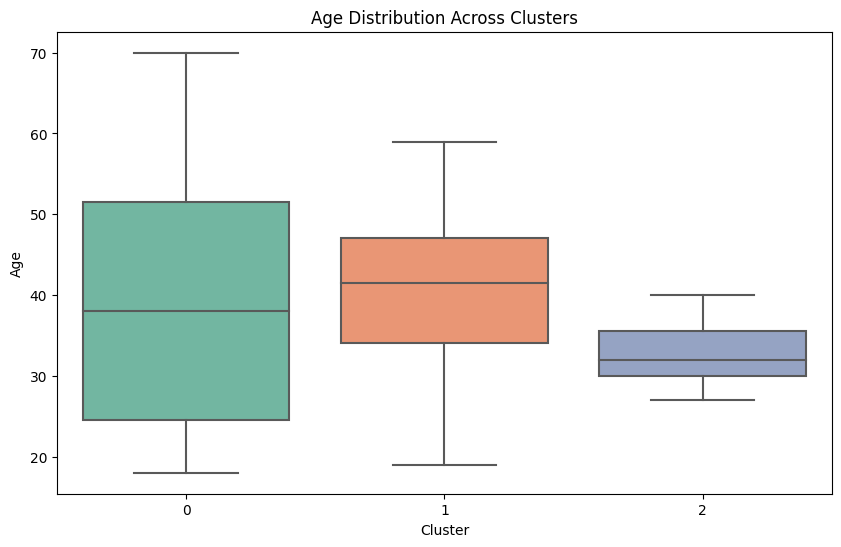

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Age', data=df, palette='Set2')
plt.title('Age Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()

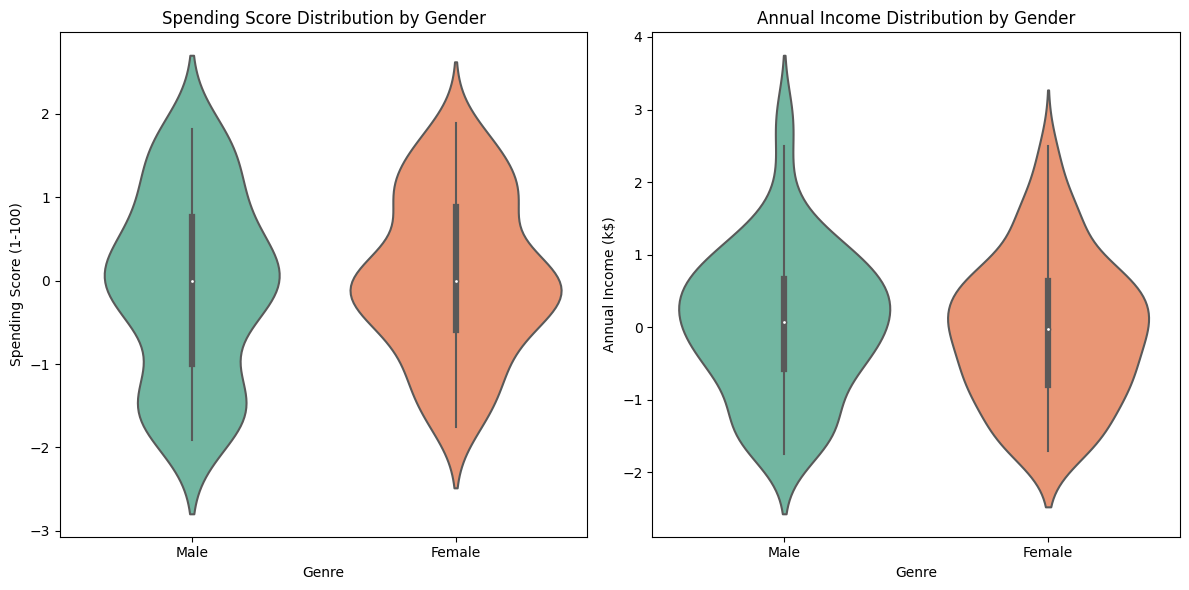

In [14]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.violinplot(x='Genre', y='Spending Score (1-100)', data=df, palette='Set2')
plt.title('Spending Score Distribution by Gender')
plt.xticks([0, 1], ['Male', 'Female'])

plt.subplot(1, 2, 2)
sns.violinplot(x='Genre', y='Annual Income (k$)', data=df, palette='Set2')
plt.title('Annual Income Distribution by Gender')
plt.xticks([0, 1], ['Male', 'Female'])

plt.tight_layout()
plt.show()